**ETW2500 Assignment #2**

**Group Members:**
1. Looi Ivy - Q1, Q3, Q5
2. Lim Jia En - Q2, Q4, Q6

In [ ]:
## Install packages and load libraries (it take 5 minutes to load due to size of packages)

# Installing caret package
install.packages("caret") 
library(caret)

# Installing dplyr package
install.packages("dplyr")
library(dplyr)

#Installing scales package
install.packages("scales") 
library(scales)

# Installing randomForest package
install.packages("randomForest")
library(randomForest)

# Installing rpart package
install.packages("rpart")
library(rpart)

# Installing ggplot2 package
install.packages("ggplot2")
library(ggplot2)

# Installing rpart package
install.packages("rpart")
library(rpart)

# Installing rattle package
install.packages("rattle")
library(rattle)

# Installing caret package
install.packages("C50") 
library(C50)

In [ ]:
# Remove all warnings
options(warn=-1)

In [ ]:
## Dataset - not allowed to change link
shoppers = read.csv("https://www.dropbox.com/s/hyg2sw11lqk14q4/Online%20Shoppers%20Intention.csv?dl=1")

In [ ]:
# Removed the not available values (NA) (if any) from the orginial data
Shoppers <- na.omit(shoppers)

In [ ]:
# Randomly select and use 3000 rows using the seed number of your group (Group 32)
set.seed(32)
data <- as.data.frame(sample_n(Shoppers,3000))

In [ ]:
# To view last 3 rows of dataset to ensure there are 3000 rows
tail(data,3)

##**Research Objectives** 
**Research Objective: To examine in-depth on the online shoppers data**


>**(Statistic)**

Q1: To assess the proportion of visitor types among the online shoppers

Q2: To assess the proportion of visitor type who made transactions on weekday and weekend 

Q3: To assess the revenue in different months
 

>**(Method)**

Q4: To classify and predict the revenue of the online shop in December by using the Random Forest Model

Q5: To classify and predict the revenue of the online shop in December by using the Classification Tree Model

Q6: To classify and predict the revenue of the online shop in December by using the C5.0 Classification Model


##**Statistics**

>**Use statistics to explain the original data set**

In [ ]:
# See summary of data
summary(shoppers)

- The Shoppers dataset consists of 16 variables - Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue.   

In [ ]:
# See data structure
# Ensure all classes are correct
str(shoppers)

- The shoppers dataset consists of 12330 observations.

- There are 6 integer variable, 6 numerical variable, 2 character variable, and 2 logical variable.

> **Q1: To assess the proportion of visitor types among the online shoppers**

In [ ]:
# The number of each visitor type
(Number <- shoppers %>%
 group_by(VisitorType) %>%
  summarise(count=n()))

# Compute & convert the proportion value to percentage
(proportion_newvisitor <- 1694/(1694 + 85 + 10551) * 100)
(proportion_other <- 85 / (1694 + 85 + 10551) * 100)
(proportion_returningvisitor <- 10551 / (1694 + 85 + 10551) * 100)

# Create Dataset which only consists of visitortype and the percentage for each visitor type
visitortype <- c("New Visitor", "Other", "Returning Visitor")
Total_percentage_visitortype2 <- c(13.74, 0.69, 85.57 )
Table_visitortype <- data.frame(visitortype, Total_percentage_visitortype2)

# Change visitortype to recognised in character
Table_visitortype$visitortype <-as.character(Table_visitortype$visitortype)
Table_visitortype

VisitorType,count
<chr>,<int>
New_Visitor,1694
Other,85
Returning_Visitor,10551


[1] 13.73885

[1] 0.6893755

[1] 85.57178

visitortype,Total_percentage_visitortype2
<chr>,<dbl>
New Visitor,13.74
Other,0.69
Returning Visitor,85.57


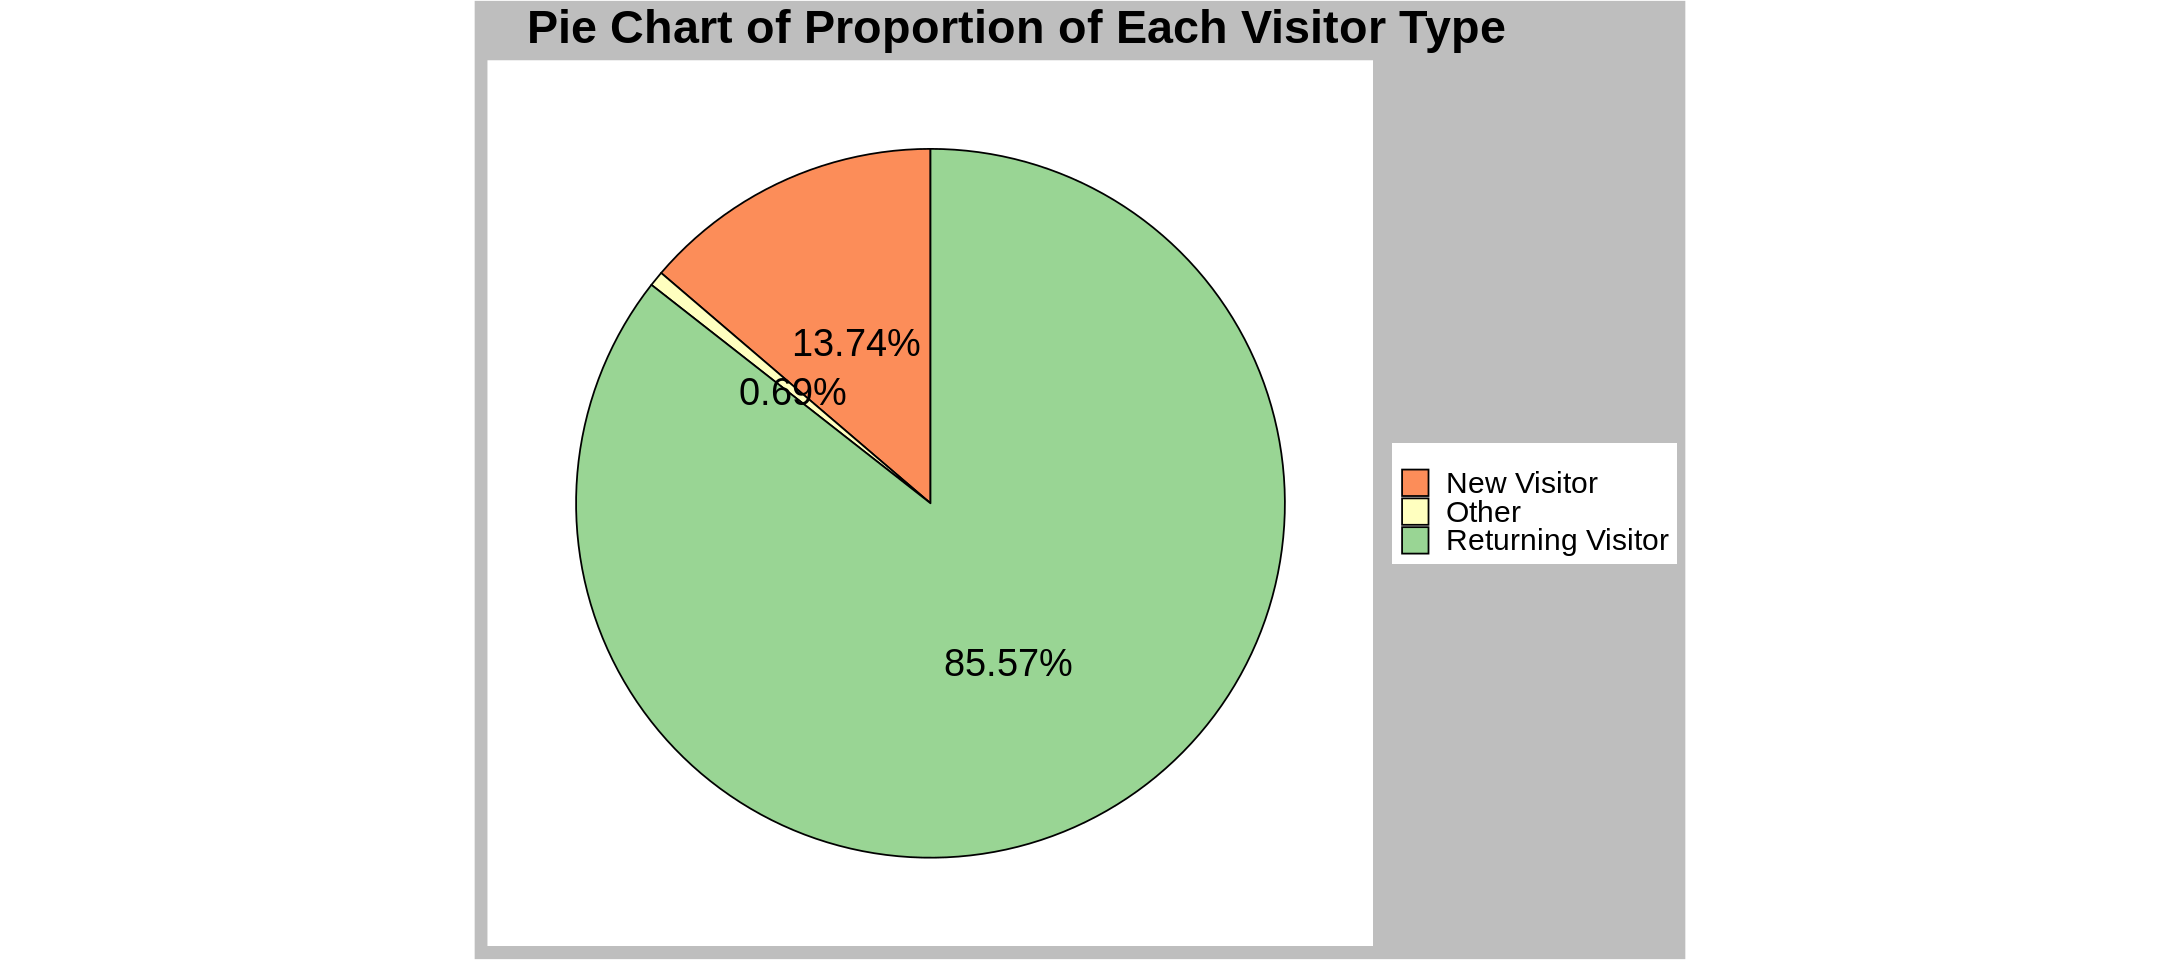

In [ ]:
# Create pie chart
pie_visitortype = ggplot(Table_visitortype, aes(x="", y = Total_percentage_visitortype2 , fill=visitortype)) + 
        geom_bar(stat="identity", width=1, color="black") + coord_polar("y", start=0) + 
        geom_text(aes(label = paste0((Total_percentage_visitortype2), "%")), position = position_stack(vjust = 0.5), color= "black", size =8,face="bold")+
        scale_fill_brewer(palette="Spectral") +
        labs(x = NULL, y = NULL, fill = NULL, title = "Pie Chart of Proportion of Each Visitor Type")+
        theme_classic() + theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank(),
          plot.title = element_text(hjust=5, color = "black")) +
        theme(plot.background = element_rect(fill = "Grey")) +
        theme(plot.title = element_text(size=28, face="bold", hjust=-0.43, vjust=0.8)) +
        theme(legend.title = element_text(size =20),legend.text = element_text(size = 18))

        #Enlarge plotted graphs 
        options(repr.plot.width=18, repr.plot.height=8) #(Stack Overflow, 2020)
pie_visitortype

- Among the all 12330 visitors, 85.57% of them are returning visitors, 13.74% of them are new visitors, and only 0.69% of them are others.



> **Q2: To assess the proportion of visitor type who made transactions on weekday and weekend**

In [ ]:
## To study the visitor type who made transactions on Weekday
# Create dataframe only included VisitorType, Weekend=FALSE (Weekday), Revenue=TRUE
visitor_weekday_revenue1 <- Shoppers %>%
              select(VisitorType, Weekend, Revenue) %>%
              filter(Weekend=="FALSE", Revenue == "TRUE")
           
# The number of each visitor type
(Number1 <- visitor_weekday_revenue1 %>%
       group_by(VisitorType) %>%
       summarise(count=n()))

# Compute & convert the proportion value to percentage
(proportion_New_Visitor1 <- 317/(317+15+1077) * 100)
(proportion_Other1 <- 15/(317+15+1077) * 100)
(proportion_Returning_Visitor1 <- 1077/(317+15+1077) * 100)

# Create Dataset which only consists of visitortype and the percentage for each visitor type
Visitortype <- c("New Visitor", "Other", "Returning Visitor")
Percentage_visitortype <- c(22.50, 1.06, 76.44)
Table_visitortype1 <- data.frame(Visitortype, Percentage_visitortype)

# Change visitortype to recognised in character
Table_visitortype1$Visitortype <-as.character(Table_visitortype1$Visitortype)
Table_visitortype1

VisitorType,count
<chr>,<int>
New_Visitor,317
Other,15
Returning_Visitor,1077


[1] 22.49823

[1] 1.064585

[1] 76.43719

Visitortype,Percentage_visitortype
<chr>,<dbl>
New Visitor,22.50
Other,1.06
Returning Visitor,76.44


In [ ]:
## To study the visitor type who made transactions on Weekend
# Create dataframe only included VisitorType, Weekend=TRUE (Weekend), Revenue=TRUE

visitor_weekend_revenue2 <- Shoppers %>%
              select(VisitorType, Weekend, Revenue) %>%
              filter(Weekend=="TRUE", Revenue == "TRUE")
           
# The number of each visitor type
(Number2 <- visitor_weekend_revenue2 %>%
       group_by(VisitorType) %>%
       summarise(count=n()))

# Compute & convert the proportion value to percentage
(proportion_New_Visitor2 <- 105/(105+1+393) * 100)
(proportion_Other2 <- 1/(105+1+393) * 100)
(proportion_Returning_Visitor2 <- 393/(105+1+393) * 100)

# Create Dataset which only consists of visitortype and the percentage for each visitor type
Visitortype <- c("New Visitor", "Other", "Returning Visitor")
Total_percentage_visitortype <- c(21.04, 0.20, 78.76 )
Table_visitortype2 <- data.frame(Visitortype, Total_percentage_visitortype)

# Change visitortype to recognised in character
Table_visitortype2$Visitortype <- as.character(Table_visitortype2$Visitortype)
Table_visitortype2

VisitorType,count
<chr>,<int>
New_Visitor,105
Other,1
Returning_Visitor,393


[1] 21.04208

[1] 0.2004008

[1] 78.75752

Visitortype,Total_percentage_visitortype
<chr>,<dbl>
New Visitor,21.04
Other,0.20
Returning Visitor,78.76


In [ ]:
# Create Dataset which only consists of Weekend & Weekday, visitortype and the percentage for each visitor type, and Revenue=TRUE
Weekend <- c("Weekday","Weekday","Weekday","Weekend","Weekend","Weekend")
Visitortype <- c("New Visitor", "Other", "Returning Visitor","New Visitor", "Other", "Returning Visitor")
Percentage_visitortype <- c(22.50, 1.06, 76.44, 21.04, 0.20, 78.76 )
Revenue <- c("TRUE","TRUE","TRUE","TRUE","TRUE","TRUE")
(Table_visitor_weekend_percentage3 <- data.frame(Weekend, Visitortype, Percentage_visitortype, Revenue))

# Change visitortype and Weekend to recognised in character
Table_visitor_weekend_percentage3$Visitortype <- as.character(Table_visitor_weekend_percentage3$Visitortype)
Table_visitor_weekend_percentage3$Weekend <- as.character(Table_visitor_weekend_percentage3$Weekend)

Weekend,Visitortype,Percentage_visitortype,Revenue
<chr>,<chr>,<dbl>,<chr>
Weekday,New Visitor,22.50,TRUE
Weekday,Other,1.06,TRUE
Weekday,Returning Visitor,76.44,TRUE
Weekend,New Visitor,21.04,TRUE
Weekend,Other,0.20,TRUE
Weekend,Returning Visitor,78.76,TRUE


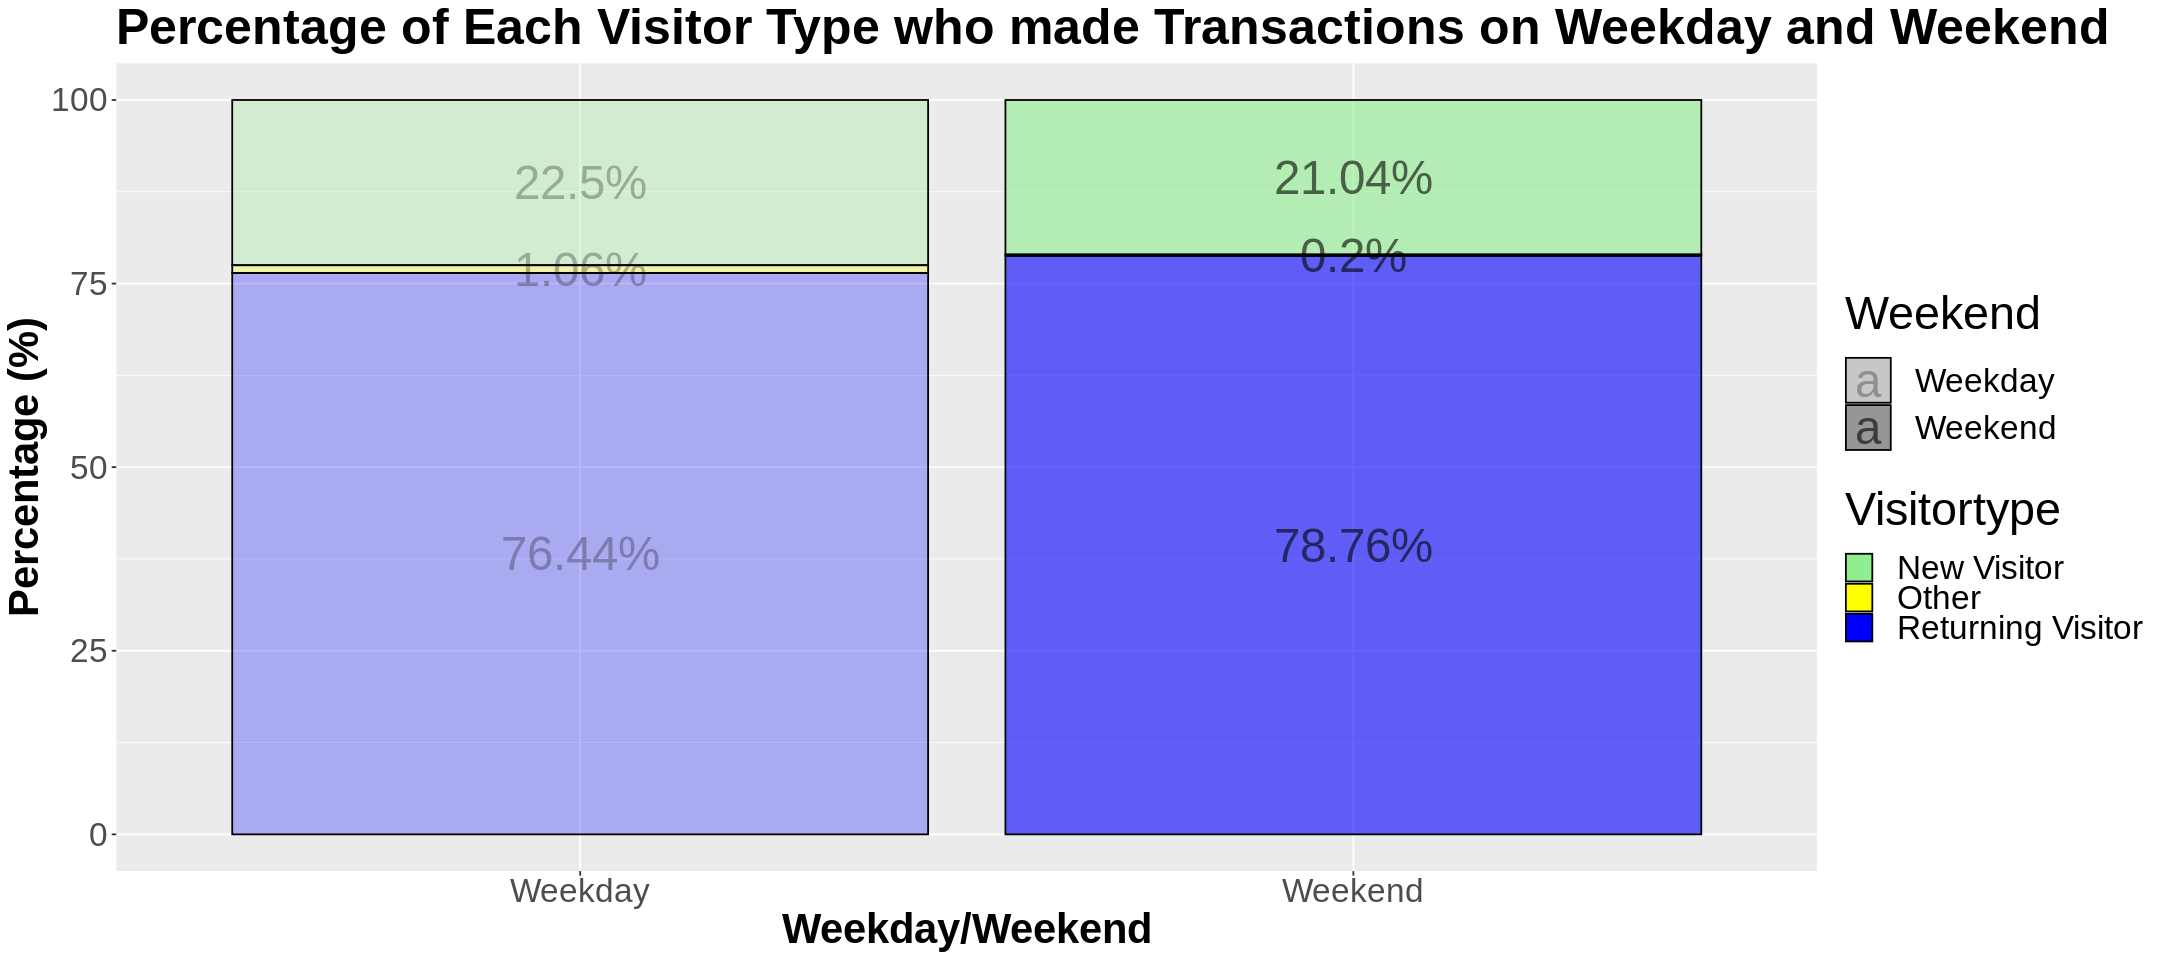

In [ ]:
## Create a percent stacked bar
percentstackedbar <- ggplot(Table_visitor_weekend_percentage3, aes(x = Weekend, y = Percentage_visitortype,  color=Weekend, fill=Visitortype, alpha=Weekend))+
    geom_bar(stat="identity", color="black") + 
    geom_text(size=10, position=position_stack(vjust = 0.5), aes(label=paste0(Percentage_visitortype, "%")), color="black", face="bold") +
    labs(y="Percentage (%)", x="Weekday/Weekend") +
    ggtitle("Percentage of Each Visitor Type who made Transactions on Weekday and Weekend") +
    theme(plot.title = element_text(size=30, face="bold"), axis.title.x = element_text(face = "bold", size =25), axis.title.y = element_text(face = "bold", size = 25)) +
    theme(axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) + theme(legend.title = element_text(size = 28), legend.text = element_text(size = 20)) +
    scale_alpha_manual(values = c(0.28,0.6))  +
    scale_fill_manual(breaks = c("New Visitor", "Other", "Returning Visitor"),values=c("light green", "yellow", "blue"))
  
percentstackedbar

- The percentage of new visitor, other, returning visitor in weekday are 22.50%, 1.06%, and 76.44% respectively whereas the percentage of new visitor, other, returning visitor in weekend are 21.04%, 0.2%, and 78.76% respectively.

- There is a similarity between both weekday and weekend online shoppers which is the returning visitor is always the majority among 3 types of visitors, followed by new visitor, and other.

> **Q3: To assess the revenue in different months**

In [ ]:
# Show the number of the revenue for different month (except January & April which is excluded in the original dataset)
shoppers %>%
filter(Revenue = TRUE) %>%
group_by(Month)%>%
summarise(count=n())

Month,count
<chr>,<int>
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549


In [ ]:
# Create new data frame
month <- c("Feb", "Mar", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec")
revenue <- c(184, 1907, 3364, 288, 432, 433, 448, 549, 2998, 1727 )
Revenue_for_each_month <- data.frame(month, revenue)
Revenue_for_each_month

month,revenue
<chr>,<dbl>
Feb,184
Mar,1907
May,3364
Jun,288
Jul,432
Aug,433
Sep,448
Oct,549
Nov,2998


In [ ]:
# Arrange month in order
Revenue_for_each_month$month <- factor(Revenue_for_each_month$month, levels=substr(month.name,1,3))

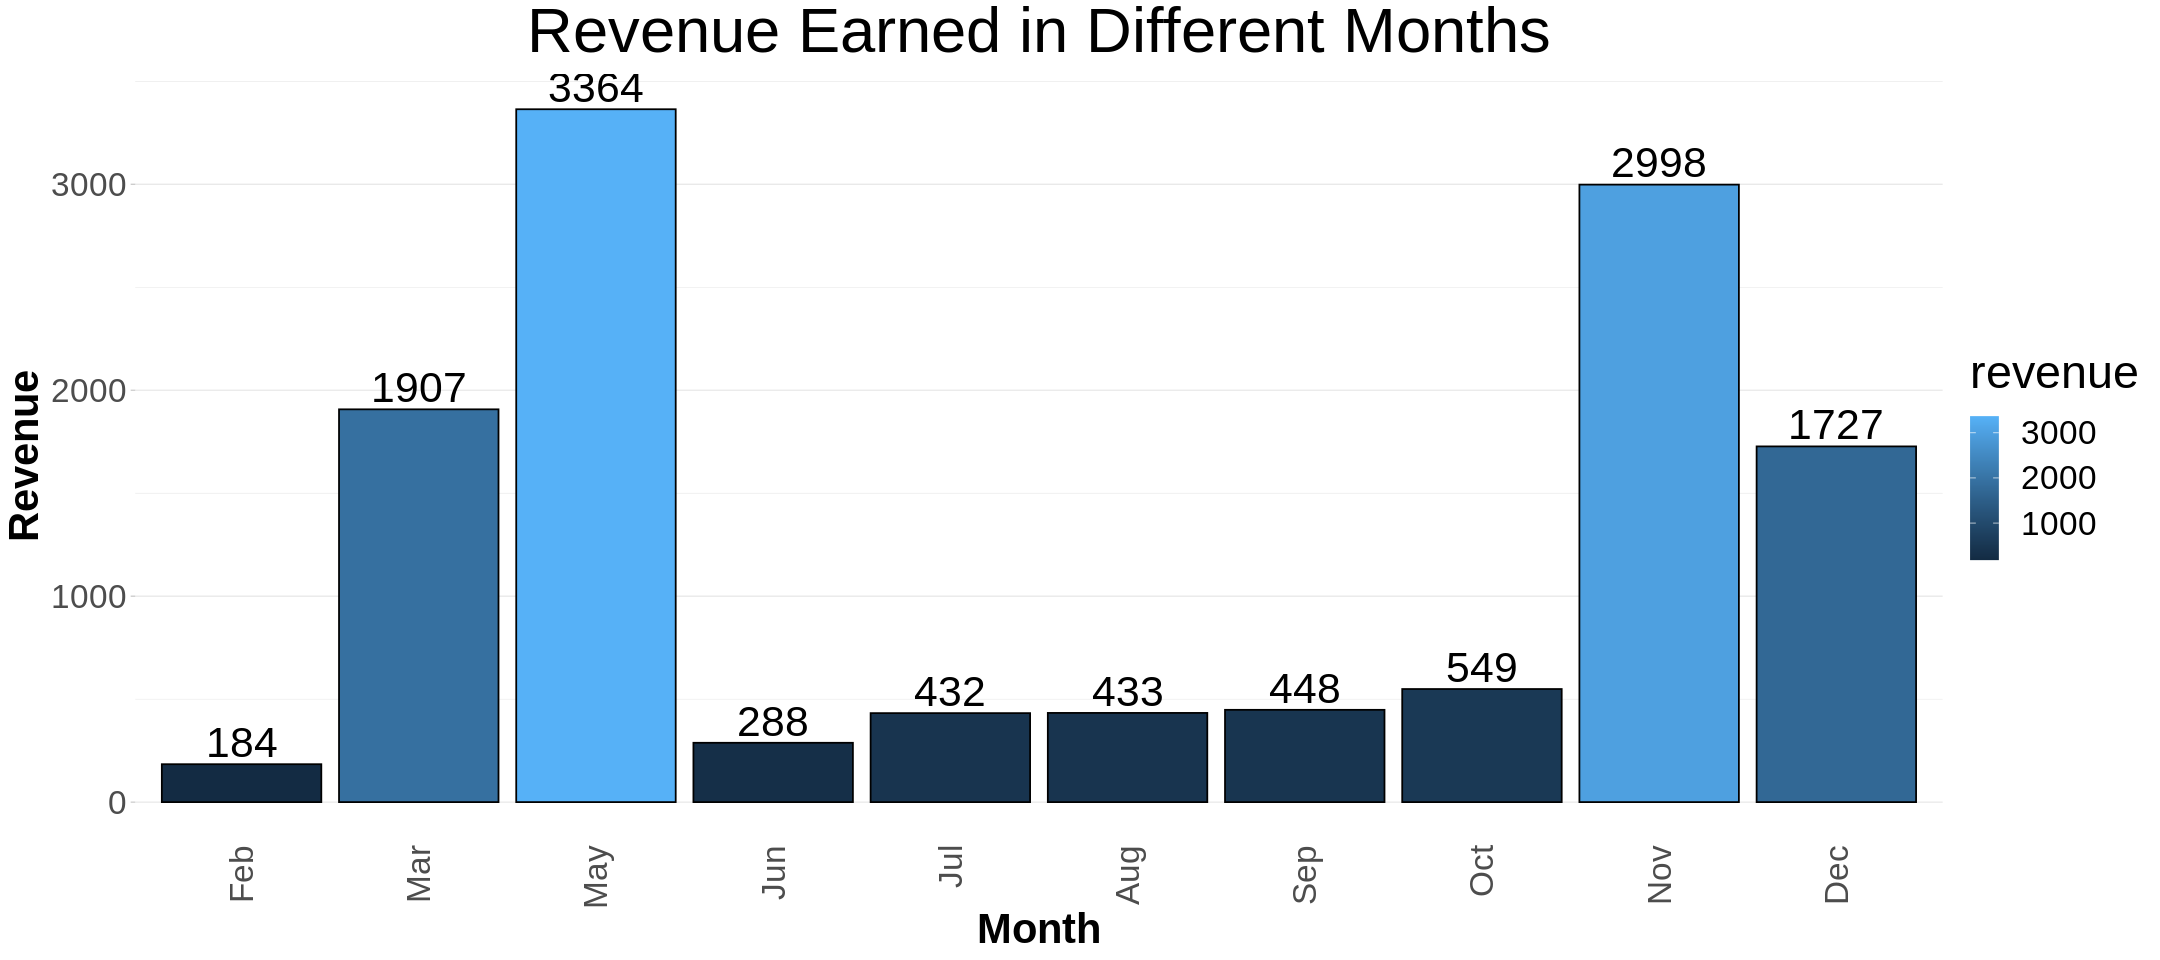

In [ ]:
# Create bar chart
Revenue_for_each_month %>%
  ggplot(aes(x = Revenue_for_each_month$month, y = revenue, fill = revenue)) +
  geom_bar(stat = "identity", color="black") + geom_text(aes(label = revenue), size=9, vjust=-0.25) +
  theme_light() +
  theme(
    panel.grid.major.x = element_blank(),
    panel.border = element_blank(),
    axis.ticks.x = element_blank()
    )+ 
    labs(x="Month", y="Revenue", title="Revenue Earned in Different Months", )+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size= 20), axis.text.y = element_text(size = 20)) + 
    theme(plot.title = element_text(hjust = 0.5, size=38), axis.title.x = element_text(face = "bold", size = 25), axis.title.y = element_text(face= "bold", size = 25)) +
    

    theme(legend.title = element_text(size = 28), legend.text = element_text(size = 20))

- The graph shows that the online shop earned the most revenue in May which had 3364 transactions made by visitors while the online shop earned the least revenue in February which only had 184 transactions made by visitors.

##**Methods**   

List tree methods used in codes, provide explanation

In [ ]:
# Change Revenue, Month and Weekend in data dataset to be recognised in factor
data$Revenue <- as.factor(data$Revenue)
data$Month <- as.factor(data$Month)

> **Validation Set Approach**

In [ ]:
# Split the data dataset (3000 rows) into two according to month

# Training dataset will be February to November
data_train <- subset(data, Month != "Dec")
list(data_train)

# Test dataset will be only December
data_test <- subset(data, Month == "Dec")
list(data_test)

,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<fct>
1,0,0.0000,22,399.8000,0.019047619,0.038095238,0.000000,0.0,Mar,1,5,7,1,Returning_Visitor,FALSE,FALSE
2,0,0.0000,15,1386.3500,0.016666667,0.027476190,6.344632,0.0,Aug,1,2,1,4,Returning_Visitor,FALSE,FALSE
3,0,0.0000,20,480.8571,0.001754386,0.005789474,0.000000,1.0,May,1,8,1,19,Returning_Visitor,TRUE,FALSE
4,0,0.0000,13,129.5000,0.015384615,0.053846154,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,FALSE,FALSE
5,0,0.0000,22,1674.5833,0.000000000,0.014666667,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,FALSE,FALSE
6,0,0.0000,11,203.9800,0.000000000,0.004444444,0.000000,0.0,Jul,2,2,1,3,New_Visitor,FALSE,FALSE
7,1,0.0000,34,1189.0536,0.000840336,0.027777778,0.000000,0.0,Nov,4,1,6,8,Returning_Visitor,FALSE,FALSE
10,0,0.0000,19,741.8333,0.000000000,0.019298246,0.000000,0.0,May,2,2,1,4,Returning_Visitor,FALSE,FALSE
11,0,0.0000,13,852.2000,0.164230769,0.180341880,0.000000,0.0,Aug,3,2,4,13,Returning_Visitor,FALSE,FALSE


,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<fct>
8,0,0.00,22,876.2500,0.000000000,0.004761905,0.000000,0,Dec,2,2,2,10,Returning_Visitor,FALSE,FALSE
9,0,0.00,46,1048.1071,0.004000000,0.013000000,20.884143,0,Dec,2,2,3,2,Returning_Visitor,FALSE,TRUE
18,0,0.00,38,3779.4444,0.000000000,0.028149920,0.000000,0,Dec,3,2,1,2,Returning_Visitor,FALSE,FALSE
19,0,0.00,2,35.5000,0.000000000,0.100000000,0.000000,0,Dec,2,6,1,11,Returning_Visitor,TRUE,FALSE
20,0,0.00,8,91.2500,0.000000000,0.020000000,0.000000,0,Dec,2,2,6,10,Returning_Visitor,FALSE,FALSE
25,0,0.00,12,115.0000,0.083333333,0.100000000,0.000000,0,Dec,3,2,8,1,Returning_Visitor,FALSE,FALSE
27,0,0.00,69,2464.2944,0.000000000,0.000544218,0.000000,0,Dec,2,2,3,2,New_Visitor,FALSE,FALSE
33,0,0.00,9,436.0000,0.000000000,0.025000000,68.197402,0,Dec,1,2,2,2,New_Visitor,FALSE,TRUE
35,0,0.00,35,1197.9325,0.000000000,0.020290360,0.000000,0,Dec,2,2,7,2,Returning_Visitor,FALSE,FALSE


There are 2591  observations in training data and 409 observations in testing data.

> **Q4: To classify and predict the revenue of the online shop in December by using the Random Forest Model** 

Random Forest Model is used to classify and predict the revenue earned by the online shop in December (test data) based on the revenue earned by the online shop from February to November (train data). It predicts the revenue earned by the online shop in December by building multiple decisions trees using a random subset of features.
The model predicts if the revenue will be true or false.

In [ ]:
## Random Forest Model using training data 
# Train the model
rf <- randomForest(Revenue~., data= data_train, ntree=200)  
rf


Call:
 randomForest(formula = Revenue ~ ., data = data_train, ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.65%
Confusion matrix:
      FALSE TRUE class.error
FALSE  2117   84  0.03816447
TRUE    192  198  0.49230769

- By consisting of 200 individual decision trees that operates as an ensemble, random forest randomly selects 3 variables which are the best feature among a random subset of features while splitting a node. Thus, it can be observed that there are 3 variables tried at each split. 

- The OOB (out-of-bag) estimate of error rate indicates that the mean prediction error of the trained model is 10.65%. 

- For FALSE revenue class, among 2201 observations (2117+84), there are 84 observations are misclassified which causes 3.82% of error rate. For TRUE revenue class, among 390 observations (192+198), there are 192 observations are misclassified which causes 49.23% of error rate.


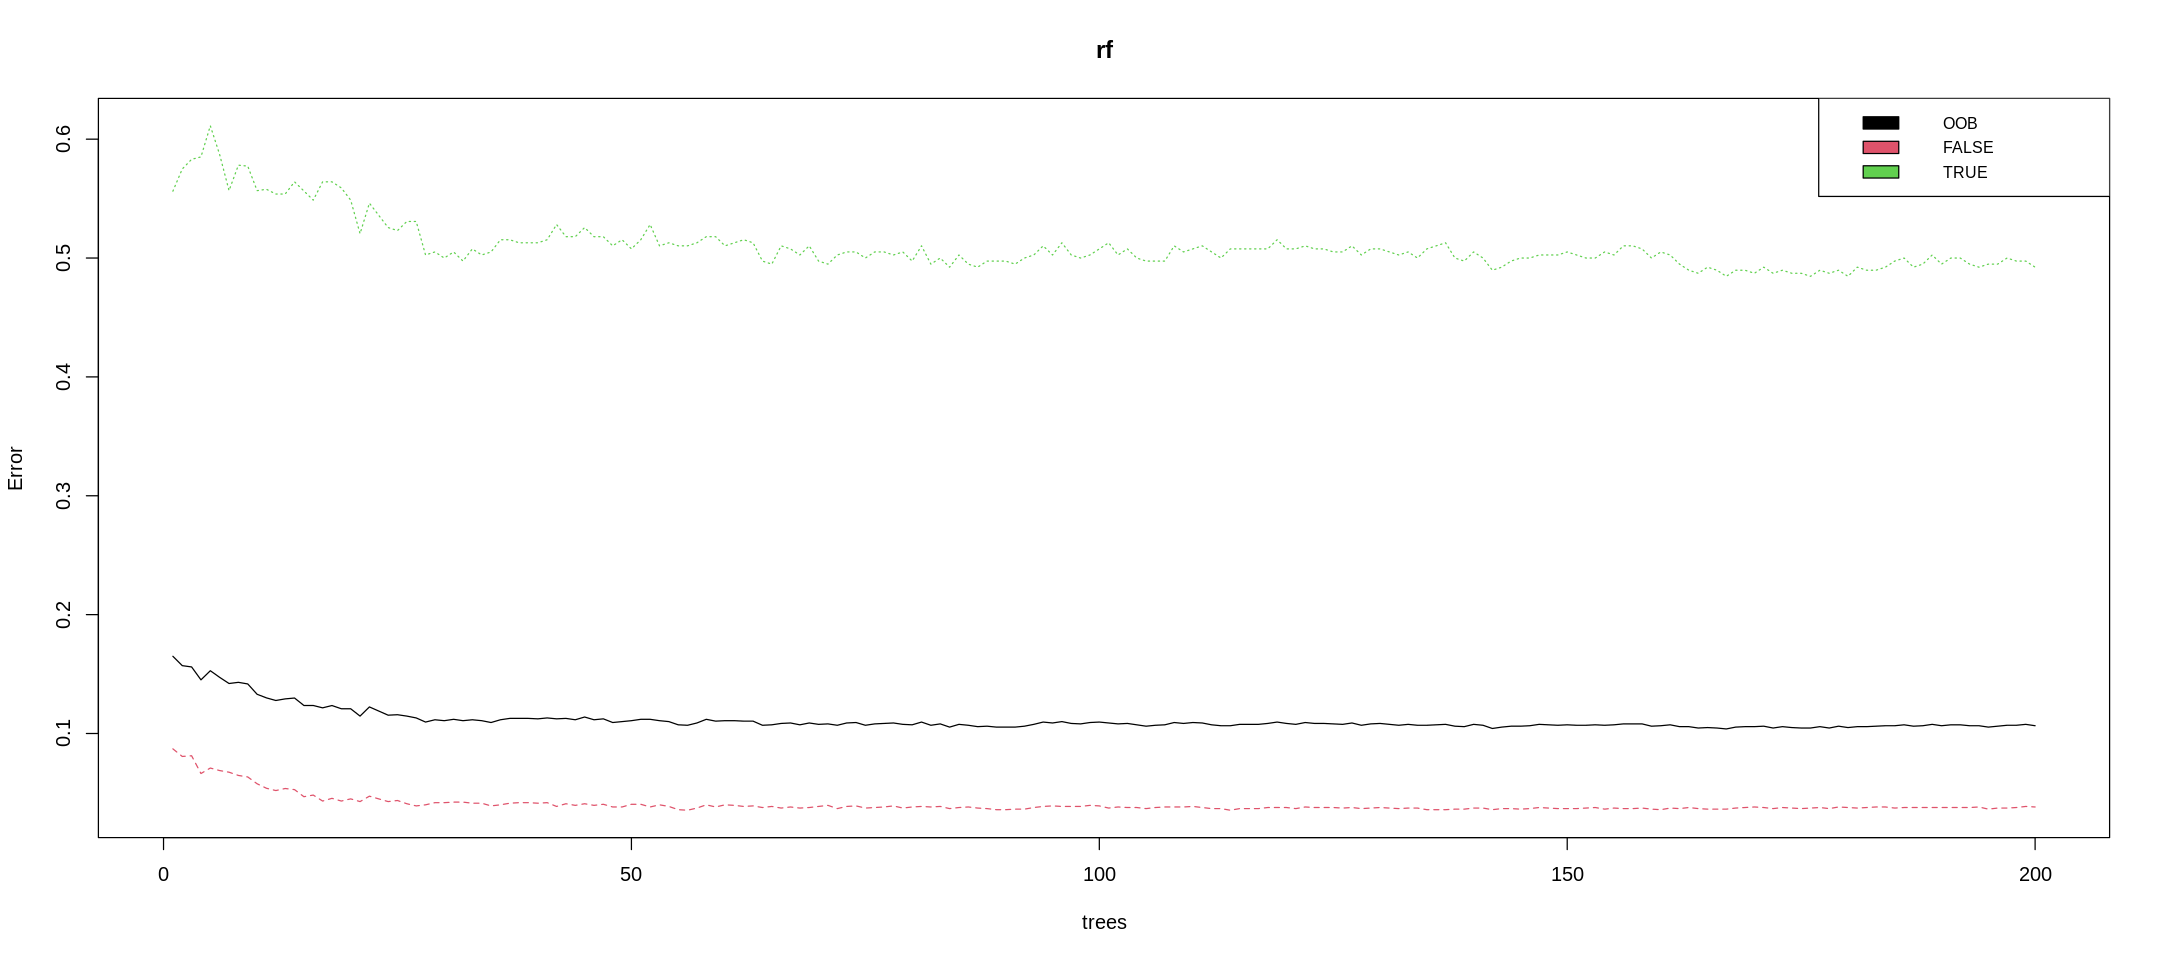

In [ ]:
# Plot the trainned Random Forest Model
plot(rf) 
legend("topright", colnames(rf$err.rate),col=1:4,cex=0.8,fill=1:4) 

In [ ]:
##Random Forest Model using test data 
# Make prediction on the test data
predictrf = predict(rf,data_test)
                    
# Compute the accuracy rate of test model
confusionMatrix(predictrf, as.factor(data_test$Revenue))

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   364   22
     TRUE      7   16
                                         
               Accuracy : 0.9291         
                 95% CI : (0.8998, 0.952)
    No Information Rate : 0.9071         
    P-Value [Acc > NIR] : 0.06982        
                                         
                  Kappa : 0.4888         
                                         
 Mcnemar's Test P-Value : 0.00933        
                                         
            Sensitivity : 0.9811         
            Specificity : 0.4211         
         Pos Pred Value : 0.9430         
         Neg Pred Value : 0.6957         
             Prevalence : 0.9071         
         Detection Rate : 0.8900         
   Detection Prevalence : 0.9438         
      Balanced Accuracy : 0.7011         
                                         
       'Positive' Class : FALSE          
                                         

 - For 409 observations, the model correctly said False and True 364 and 16 times respectively. Thus, there were 380 (364+16) correct classifications out of 409 observations.

 - The accuracy of test model is 92.91% which means for 409 revenue used in the model, the model correctly predicted 92.91% of whether the Revenue is True (online shopper made transactions) or False (online shopper did not make transactions) in December.

 - The No Information Rate is the best guess given no information beyond the overall distribution of the classes of revenue in December. In this case, "false" is the positive class, which means no transactions and no revenue. The best guess with no other information is to pick the majority class. Thus, we know that most of the revenue (90.71%) is predicted as "false".

 - The accuracy is 2.20% higher than No information rate indicates that the Random Forest Model is slightly significant.

> **Q5: To classify and predict the revenue of the online shop in December by using the Classification Tree Model**

Classification Tree Model is a predictive algorithm for a target variable used in machine learning. A Classification Tree provides a measure of confidence that the classification is correct. 

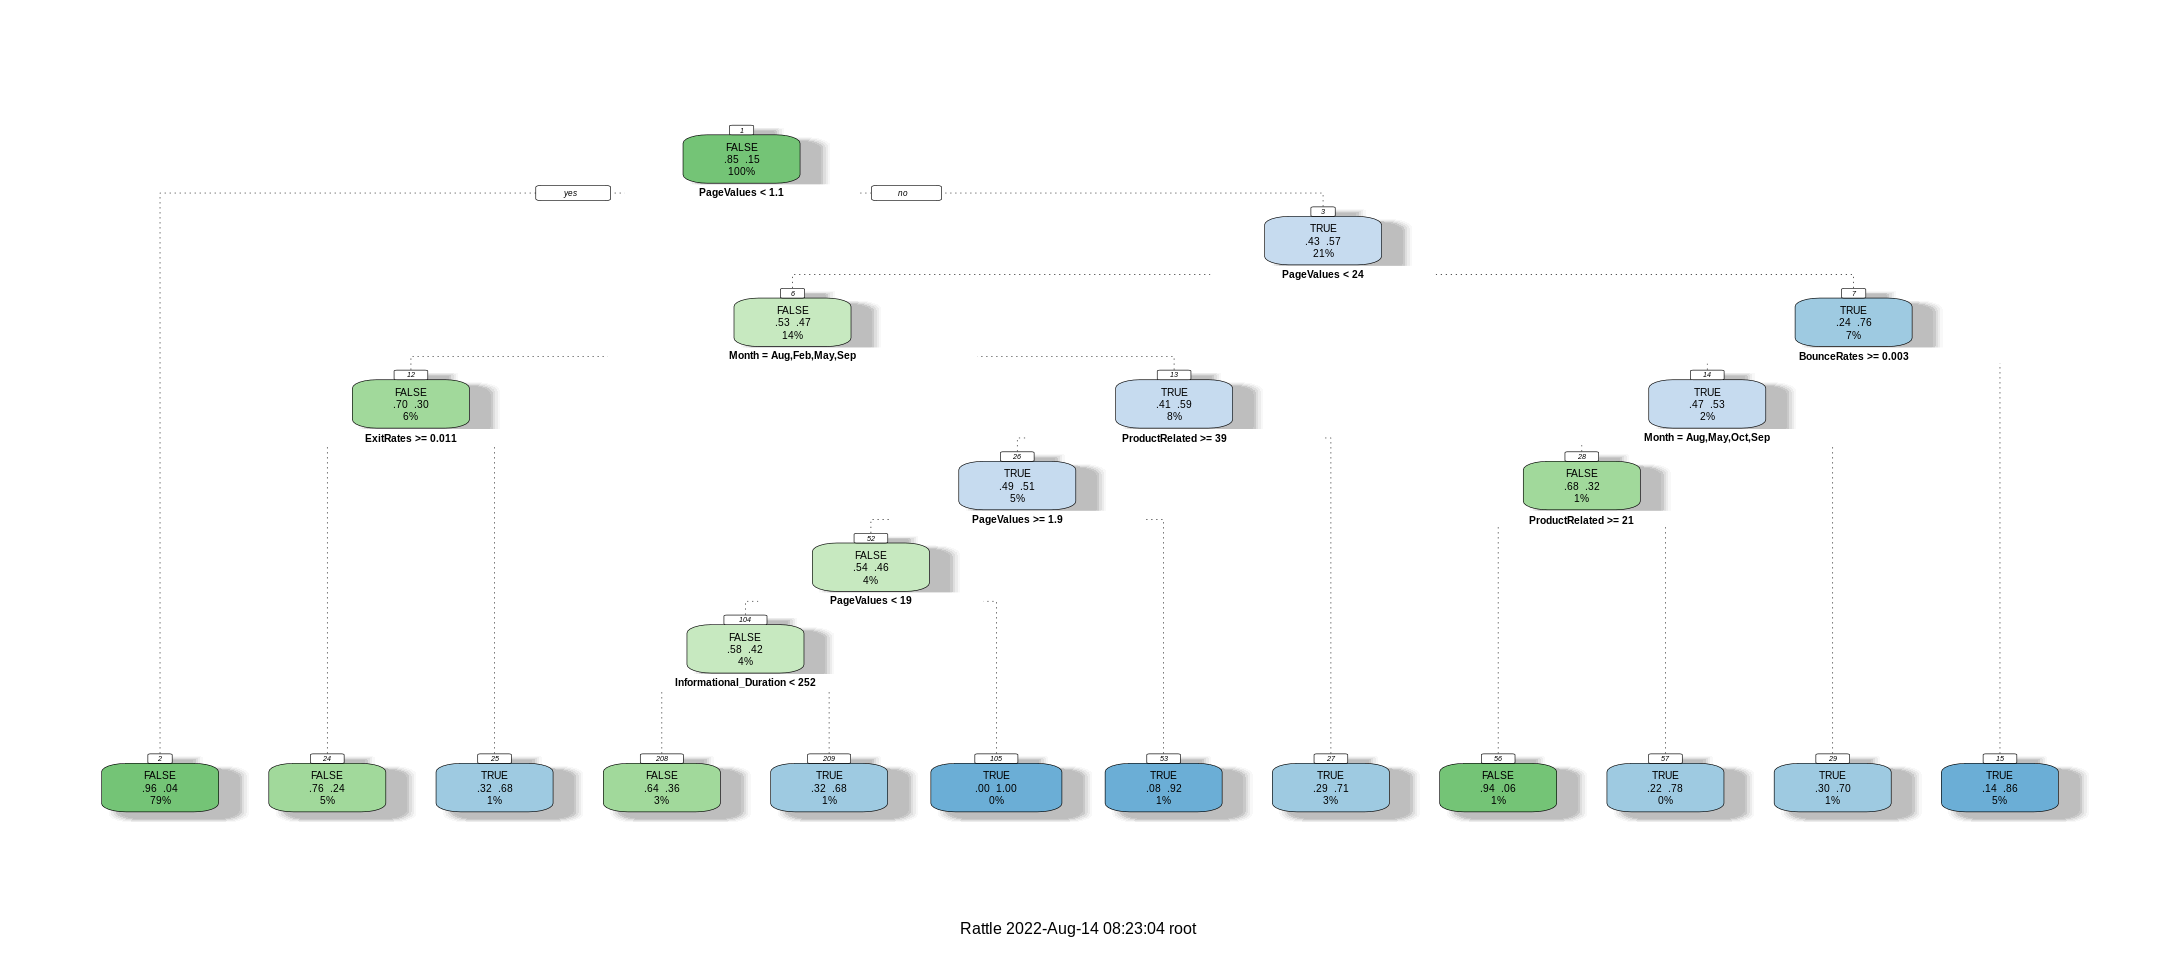

In [ ]:
# Build the model
set.seed(32)
treemodel <- rpart(Revenue~., data= data_train, method = "class") #default always is class

# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
fancyRpartPlot(treemodel)

- There are 10 decision nodes and 12 terminal nodes in the model. 
- The revenue predicted at root node is False. It shows the proportion of 'FALSE' revenue is 85%. 
- PageValues have been selected for the primary splits from the root. This node asks whether the PageValues < 1.1. If yes, then go down to the root’s left terminal node. If no, then go down to the root's right child node. 21% are PageValues >1.1, with a 'TRUE' revenue probability of 43%.
- The large tree may tend to overfit the training data in a similar way to neural networks without a weight decay. Thus, pruning is needed.

In [ ]:
# Make prediction on the test data
predictedtree = predict(treemodel, data_test, type = "class")

# Compute the accuracy rate of test model
confusionMatrix(predictedtree,data_test$Revenue)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   352   13
     TRUE     19   25
                                          
               Accuracy : 0.9218          
                 95% CI : (0.8913, 0.9459)
    No Information Rate : 0.9071          
    P-Value [Acc > NIR] : 0.1750          
                                          
                  Kappa : 0.5665          
                                          
 Mcnemar's Test P-Value : 0.3768          
                                          
            Sensitivity : 0.9488          
            Specificity : 0.6579          
         Pos Pred Value : 0.9644          
         Neg Pred Value : 0.5682          
             Prevalence : 0.9071          
         Detection Rate : 0.8606          
   Detection Prevalence : 0.8924          
      Balanced Accuracy : 0.8033          
                                          
       'Positive' Class : FALSE           
                     

 - For 409 observations, the model correctly said False and True 352 and 25 times respectively. Thus, there were 377 (352+25) correct classifications out of 409 observations.

 - The accuracy of test model is 92.18% which means for 409 revenue used in the model, the model correctly predicted 92.18% of whether the Revenue is True (online shopper made transactions) or False (online shopper did not make transactions) in December.

 - The No Information Rate is the best guess given no information beyond the overall distribution of the classes of revenue in December. In this case, "false" is the positive class, which means no transactions and no revenue. The best guess with no other information is to pick the majority class. Thus, we know that most of the revenue (90.71%) is predicted as "false".

 - The accuracy is 1.47% higher than No information rate indicates that the Classification Tree Model (before pruning) is slightly significant.

Pruning could reduce the size of the decision trees which is the sections that are not important to classify instances. This indicates that the complexity of the final classifier could be reduced, thus improve the predictive accuracy. 

In [ ]:
## Training
# Pruning the tree
# Fit the model on the training set
set.seed(32)
treemodel2 <- train(Revenue~., data= data_train, method = "rpart",
        trControl = trainControl("cv", number = 10))
print(treemodel2)

CART 

2591 samples
  15 predictor
   2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2332, 2332, 2332, 2332, 2332, 2332, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.04871795  0.8842085  0.4782272
  0.05641026  0.8807366  0.4512748
  0.18717949  0.8564197  0.2224305

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.04871795.


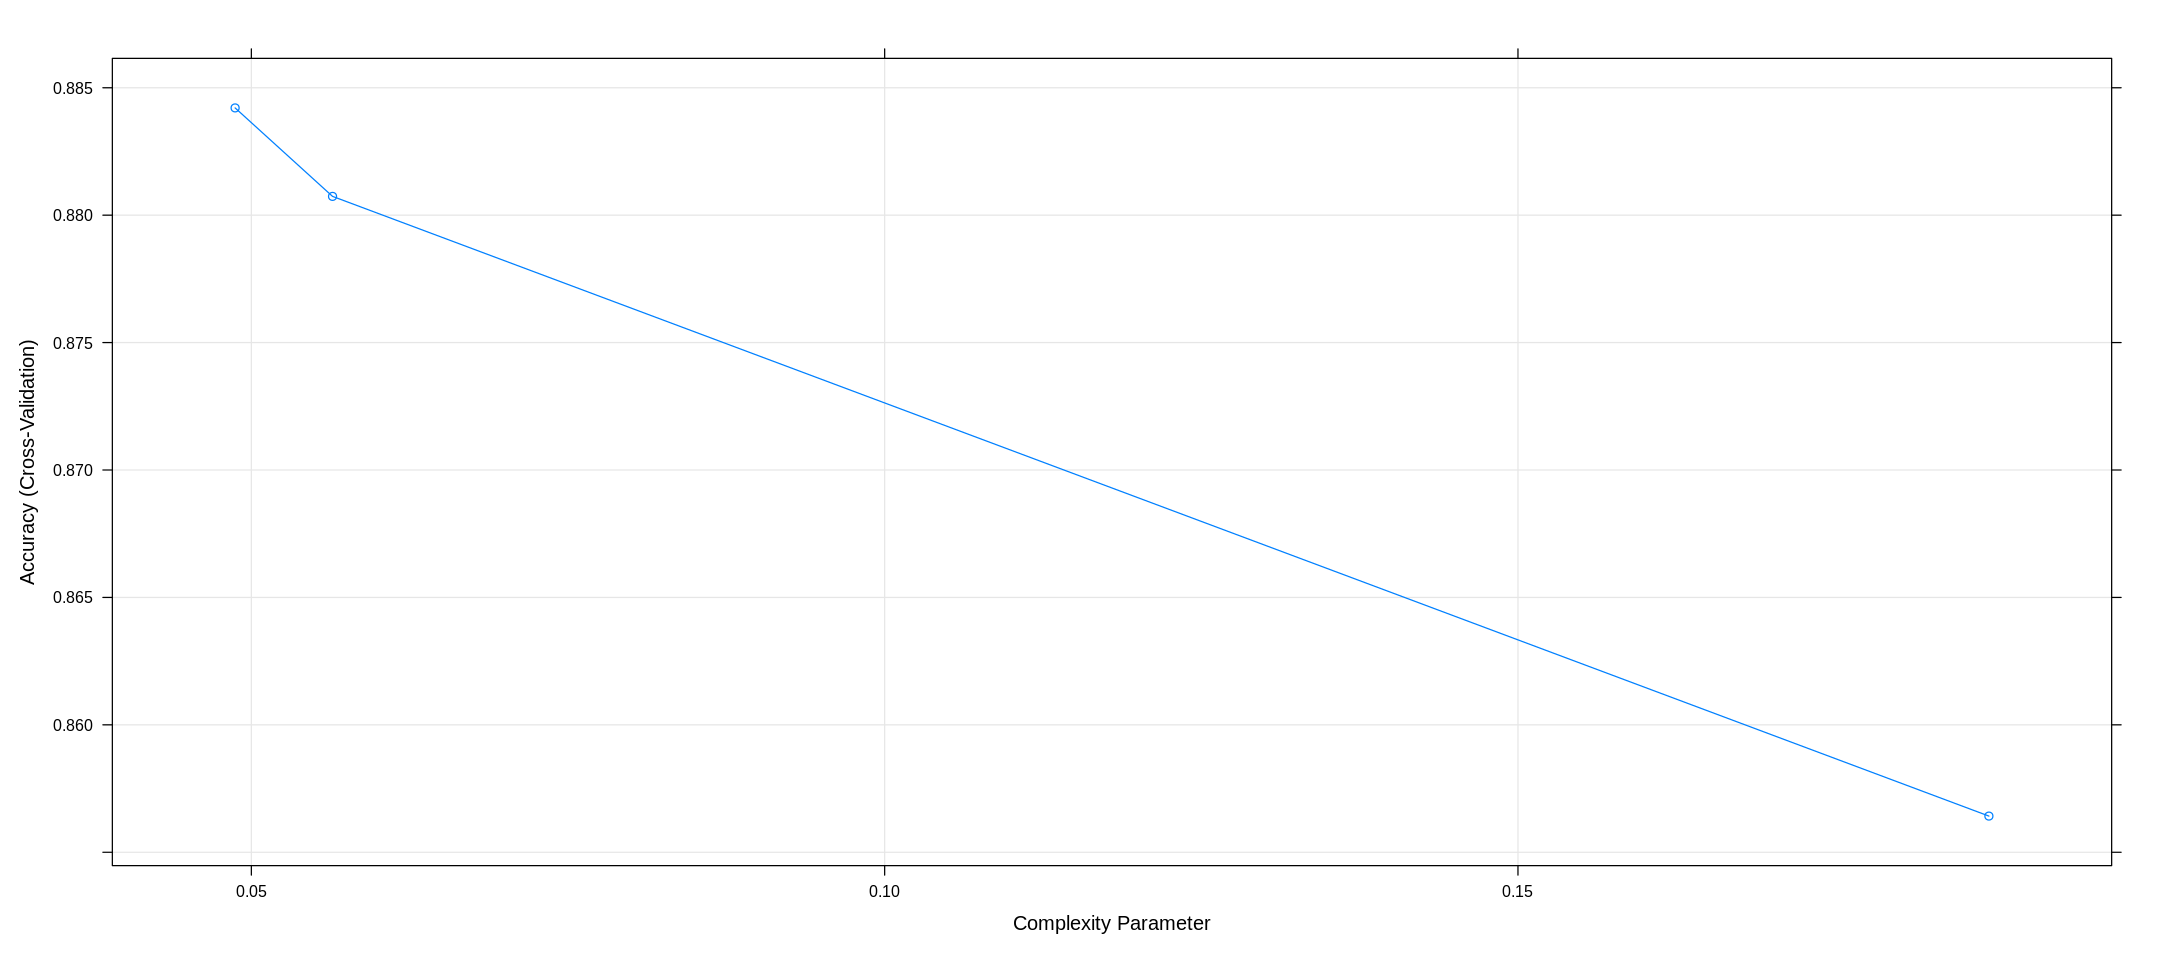

In [ ]:
# Plot model accuracy vs different values of cp (complexity parameter)
plot(treemodel2)

- The line graph shows negative direction. The complexity parameter (cp) is used to control the size of the decision tree and to select the optimal tree size.

In [ ]:
# Print the best tuning parameter cp that maximizes the model accuracy
treemodel2$bestTune

,cp
,<dbl>
1,0.04871795


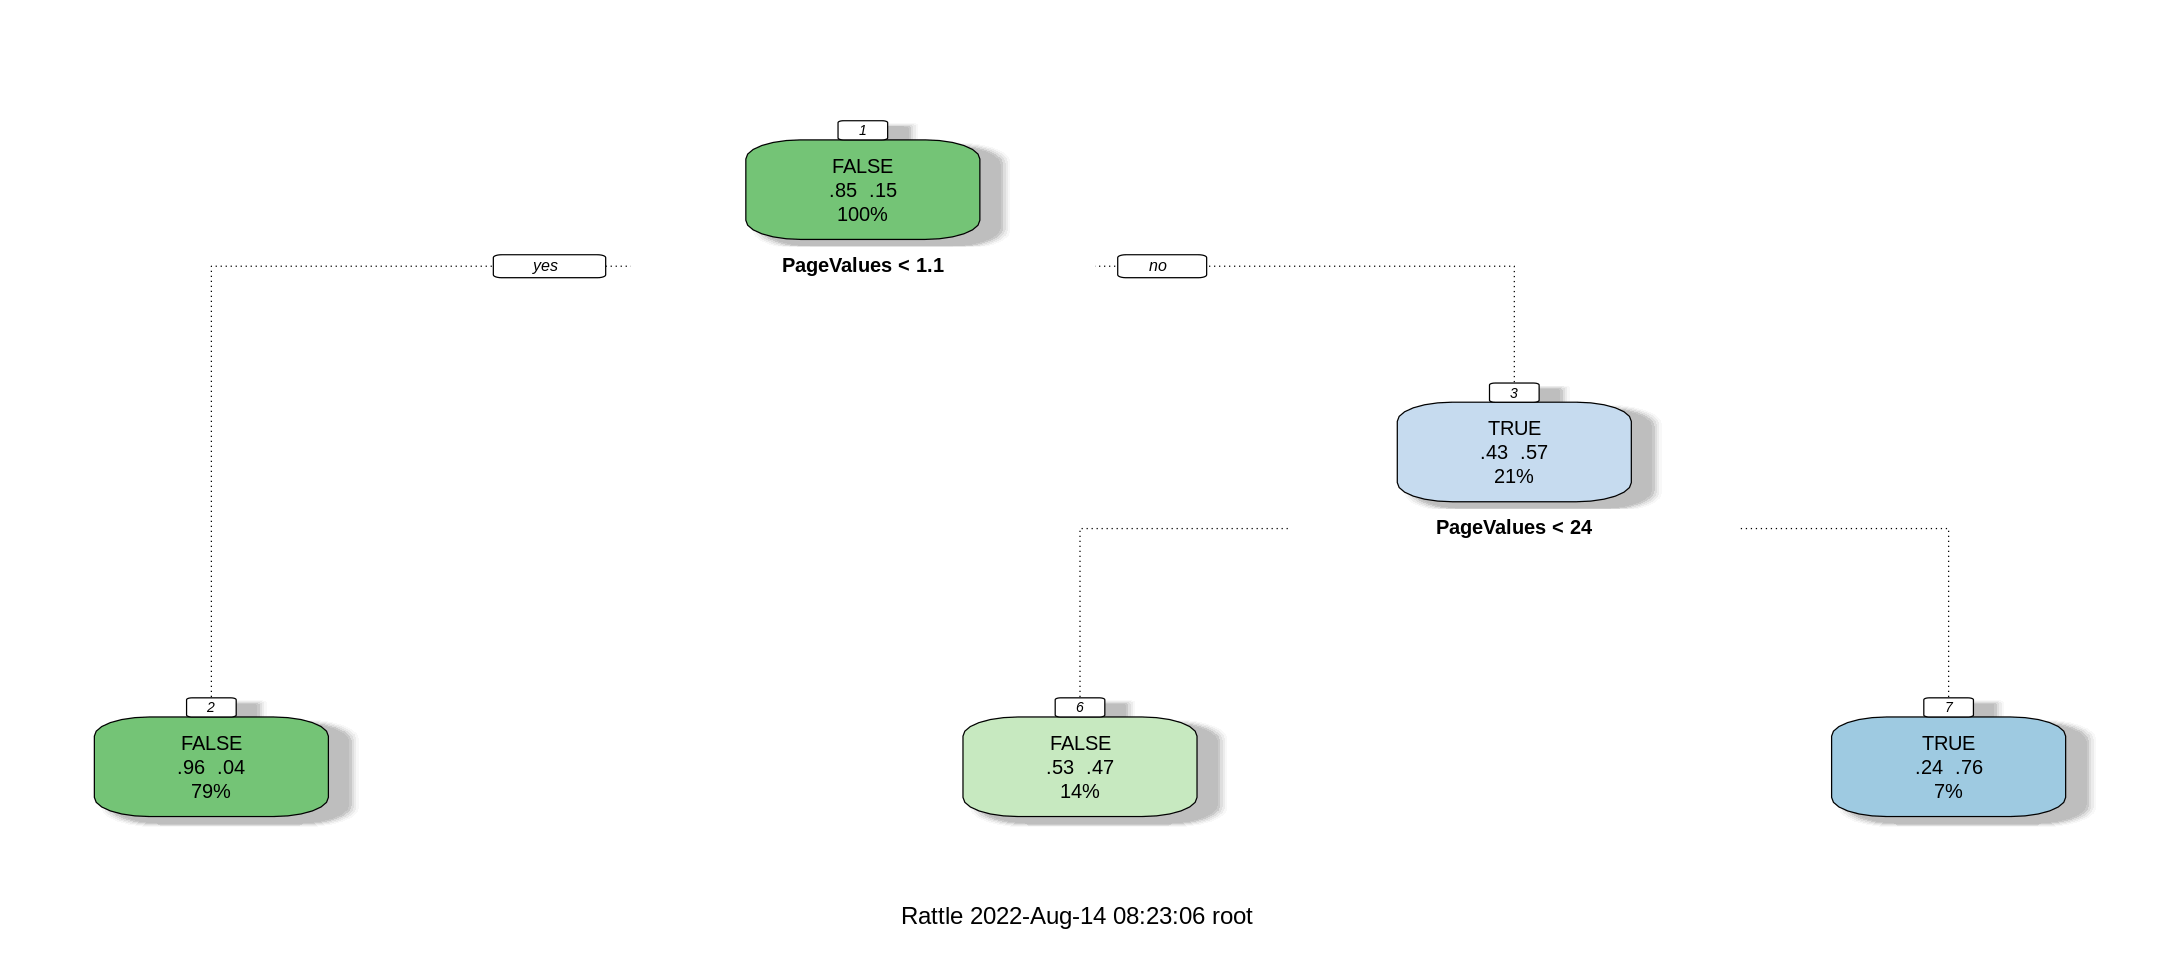

In [ ]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
fancyRpartPlot(treemodel2$finalModel)

- There are 1 decision node and 3 terminal nodes in the model.
- The revenue predicted at root node is False. It shows the proportion of 'FALSE' revenue is 85%. 
- PageValues have been selected for the primary splits from the root. This node asks whether the PageValues < 1.1. If yes, then go down to the root’s left terminal node. If no, then go down to the root's right child node. 21% are PageValues >1.1, with a 'TRUE' revenue probability of 43%.
- After pruning, the tree is shorten. Pruning reduces the size of the tree by turning some branch nodes into terminal nodes, and removing the terminal nodes under the original branch. 


After pruning, there are only 3 levels left in the model. There are only 3 terminal nodes, which means these are the important features.

In [ ]:
# Decision rules in the model
treemodel2$finalModel

n= 2591 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 2591 390 FALSE (0.84947897 0.15052103)  
  2) PageValues< 1.109295 2048  82 FALSE (0.95996094 0.04003906) *
  3) PageValues>=1.109295 543 235 TRUE (0.43278085 0.56721915)  
    6) PageValues< 23.74342 358 168 FALSE (0.53072626 0.46927374) *
    7) PageValues>=23.74342 185  45 TRUE (0.24324324 0.75675676) *

This is the numerical presentation of the graphical presentation above.


In [ ]:
## Testing
# Make prediction on the test data
predictedtree2 = predict(treemodel2, data_test)

# Compute the accuracy rate of the treemodel2 (test data)
confusionMatrix(predictedtree2, data_test$Revenue)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   363   22
     TRUE      8   16
                                        
               Accuracy : 0.9267        
                 95% CI : (0.8969, 0.95)
    No Information Rate : 0.9071        
    P-Value [Acc > NIR] : 0.09774       
                                        
                  Kappa : 0.4786        
                                        
 Mcnemar's Test P-Value : 0.01762       
                                        
            Sensitivity : 0.9784        
            Specificity : 0.4211        
         Pos Pred Value : 0.9429        
         Neg Pred Value : 0.6667        
             Prevalence : 0.9071        
         Detection Rate : 0.8875        
   Detection Prevalence : 0.9413        
      Balanced Accuracy : 0.6997        
                                        
       'Positive' Class : FALSE         
                                        

 - For 409 observations, the model correctly said False and True 363 and 16 times respectively. Thus, there were 379 (363+16) correct classifications out of 409 observations.

 - The accuracy of test model is 92.67% which means for 409 revenue used in the model, the model correctly predicted 92.67% of whether the Revenue is True (online shopper made transactions) or False (online shopper did not make transactions) in December.

 - The No Information Rate of test data after pruning and before pruning is the same. Thus, we know that most of the revenue (90.71%) is predicted as "false".

 - The accuracy is 1.96% higher than No information rate indicates that the Classification Tree Model (after pruning) is slightly significant.

 - The accuracy of after-pruning model (92.67%) has been improved compared to the accuracy of before-pruning model (92.18%).


> **Q6: To classify and predict the revenue of the online shop in December by using the C5.0 Classification Model**

A C5.0 model split the sample based on the field that provides the maximum information gain. It will split again from the first split, usually based on a different field, then become subsamples. This process will repeats until the subsamples cannot be split any further. Finally, those that consider insignificant to the value of the model will be removed, then the lowest-level splits are reexamined (IBM, 2020).

In [ ]:
# Build the model using training set
set.seed(32)
data_train$Weekend <- as.factor(data_train$Weekend)
C50Tree <- C5.0(Revenue~., data= data_train)

summary(C50Tree)


Call:
C5.0.formula(formula = Revenue ~ ., data = data_train)


C5.0 [Release 2.07 GPL Edition]  	Sun Aug 14 08:23:06 2022
-------------------------------

Class specified by attribute `outcome'

Read 2591 cases (16 attributes) from undefined.data

Decision tree:

PageValues <= 0.888486: FALSE (2044/81)
PageValues > 0.888486:
:...PageValues <= 23.66359:
    :...VisitorType = Other: FALSE (0)
    :   VisitorType = New_Visitor: TRUE (19/2)
    :   VisitorType = Returning_Visitor:
    :   :...Month = Dec: FALSE (0)
    :       Month in {Jul,June,Mar,Nov,Oct}: TRUE (199/87)
    :       Month in {Aug,Feb,May,Sep}:
    :       :...ExitRates <= 0.01085106: TRUE (16/5)
    :           ExitRates > 0.01085106: FALSE (128/29)
    PageValues > 23.66359:
    :...BounceRates > 0.002941176: TRUE (58/27)
        BounceRates <= 0.002941176:
        :...OperatingSystems <= 2: TRUE (111/12)
            OperatingSystems > 2:
            :...OperatingSystems <= 3: FALSE (8/3)
                OperatingSyste

- This output shows that the decision tree has 9 leaf nodes and, using the training data, resulted in 247 items being mis-classified.
- 2344 (2067+277) classified correctly out of 2591 observations.
- Only 6 of the 16 attributes were used in the decision tree. 

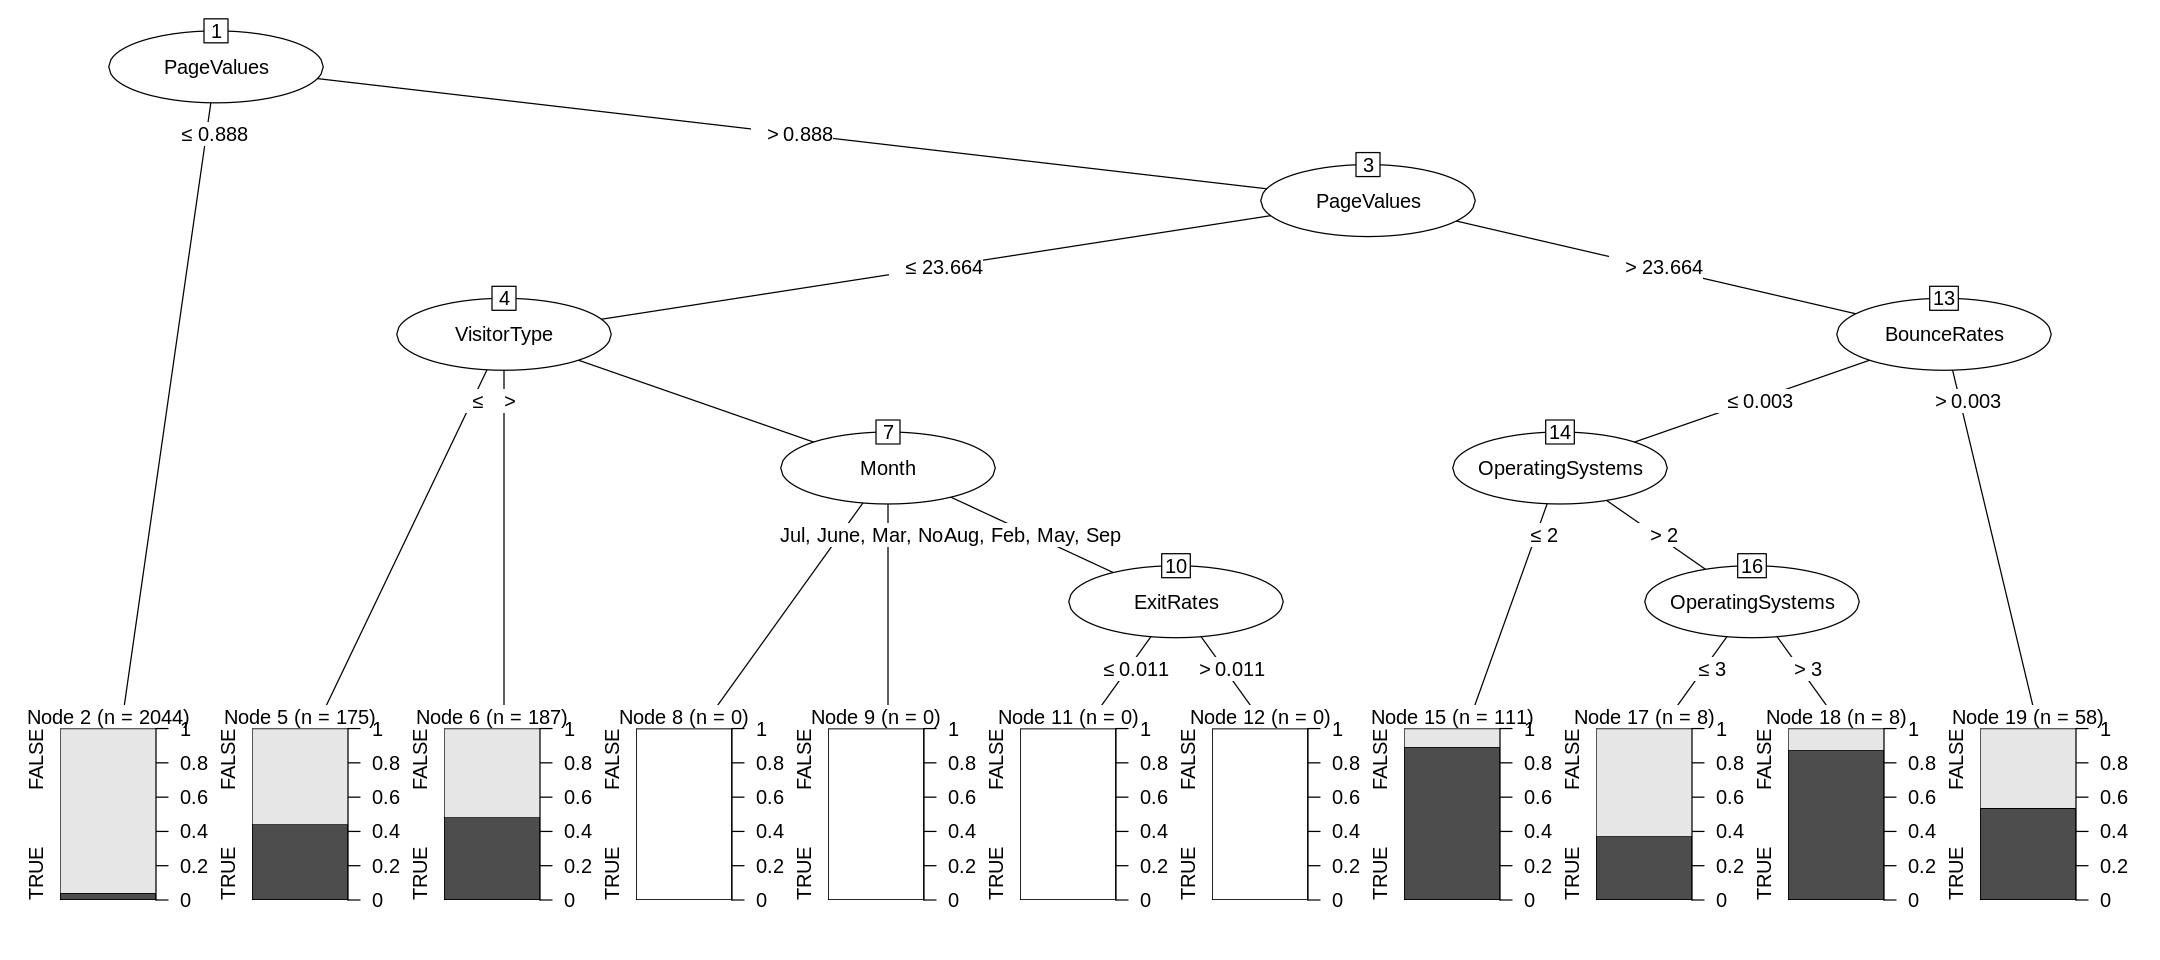

In [ ]:
# Plot the C5.0 classification model
plot(C50Tree)

- There are 7 decision nodes and 11 terminal nodes in the model.
- From the tree it is clear that the revenue which have a PageValues less than or equal to 0.888 are FALSE.

In [ ]:
# Make prediction on the test data
predictedC50 = predict(C50Tree, data_test)

# Compute the accuracy rate of test model 
confusionMatrix(predictedC50, data_test$Revenue)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   363   18
     TRUE      8   20
                                          
               Accuracy : 0.9364          
                 95% CI : (0.9082, 0.9581)
    No Information Rate : 0.9071          
    P-Value [Acc > NIR] : 0.02085         
                                          
                  Kappa : 0.5723          
                                          
 Mcnemar's Test P-Value : 0.07756         
                                          
            Sensitivity : 0.9784          
            Specificity : 0.5263          
         Pos Pred Value : 0.9528          
         Neg Pred Value : 0.7143          
             Prevalence : 0.9071          
         Detection Rate : 0.8875          
   Detection Prevalence : 0.9315          
      Balanced Accuracy : 0.7524          
                                          
       'Positive' Class : FALSE           
                     

 - For 409 observations, the model correctly said False and True 363 and 20 times respectively. Thus, there were 383 (363+20) correct classifications out of 409 observations.

 - The accuracy of test model is 93.64% which means for 409 revenue used in the model, the model correctly predicted 93.64% of whether the Revenue is True (online shopper made transactions) or False (online shopper did not make transactions) in December.

 - The No Information Rate is the best guess given no information beyond the overall distribution of the classes of revenue in December. In this case, "false" is the positive class, which means no transactions and no revenue. The best guess with no other information is to pick the majority class. Thus, we know that most of the revenue (90.71%) is predicted as "false".

 - The accuracy is 2.93% higher than No information rate indicates that the C5.0 Classification Model is slightly significant.

**Conclusions**

**Statistic**:
- Through our study, we have determined that the proportion of returning visitor is the highest, followed by the new visitor, and other.

- Besides, the percentage of returning visitor in weekday is lower than in weekend while the percentage of new visitor in weekday is higher than in weekend.

- Alternatively, among the months in a year, revenue earned in May is the highest, followed by November, whereas the revenue earned in February is the lowest.

**Classification**:
- The accuracy for test model of Random Forest Model, Classification Tree Model (after pruning) and C5.0 Classification Model are 92.91%, 92.67% and 93.64% respectively. In overall, C5.0 Classification Model has the highest accuracy, followed by Random Forest Model, and Classification Tree Model.

- In this case, C5.0 Classification Model with highest accuracy for test model might indicate that it has overfitting problems or insufficient model performance optimization (MDPI, 2021). This will cause the problem which is prone to unstable prediction when it is applied to a real problems.  

- Although the accuracy of Random Forest Model is 0.73% lower than C5.0 Classification Model in this case, however we do believe that Random Forest Model is always the best and most accurate model at all the time. This is because Random Forest Model add additionally randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This diversifies the results in a better model (Donges, 2021). 
Besides, Random Forest Model consists of multiple decision trees. Trees protect each other from individual error and produce the most accurate predictions than any of individual predictions (Yiu, 2019).


In [ ]:
#Create a table for better visualisation on the accuracy of each model
Classifier <- c("C5.0 Classification Model", "Random Forest Model", "Classification Tree Model")
Accuracy  <- c("93.64%", "92.91%", "92.67%")
(Classifier_Accuracy <- data.frame(Classifier, Accuracy))

Classifier,Accuracy
<chr>,<chr>
C5.0 Classification Model,93.64%
Random Forest Model,92.91%
Classification Tree Model,92.67%


##**References** (*Follow APA style*)
1. Donges, N. (2021). A Complete Guide to the Random Forest Algorithm. 

  Retrieved from https://builtin.com/data-science/random-forest-algorithm
2. IBM. (2021). C5.0 node. 
  
  Retrieved from https://www.ibm.com/docs/en/watson-studio-local/2.0.0?topic=modeling-c50-node
3. MDPI. (2021). Decision Tree Application to Classification Problems with Boosting Algorithm. 
  
  Retrieved from https://doi.org/10.3390/electronics10161903
4. Yiu, T. (2019). Understanding Random Forest. 
  
  Retrieved from https://towardsdatascience.com/understanding-random-forest-58381e0602d2